It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/CNN/Classical_Architectures_CNN.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Classical_Architectures_CNN.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

**Classic network architectures:**

- LeNet-5
- AlexNet
- VGG 16

**Modern network architectures:**

- Inception
- ResNet
- ResNeXt
- DenseNet



# AlexNet

AlexNet is the name of CNN, designed by  [Alex Krizhevsky](https://www.cs.toronto.edu/~kriz/) . AlexNet is considered one of the most influential papers published in computer vision, as of 2020, the paper has been cited over 70,000 times according to Google Scholar.

AlexNet competed in the [ImageNet](https://en.wikipedia.org/wiki/ImageNet) Large Scale Visual Recognition Challenge (1000 different classes) on September 30, 2012. The network achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up.

AlexNet consists of 5 Convolutional Layers and 3 Fully Connected Layers.

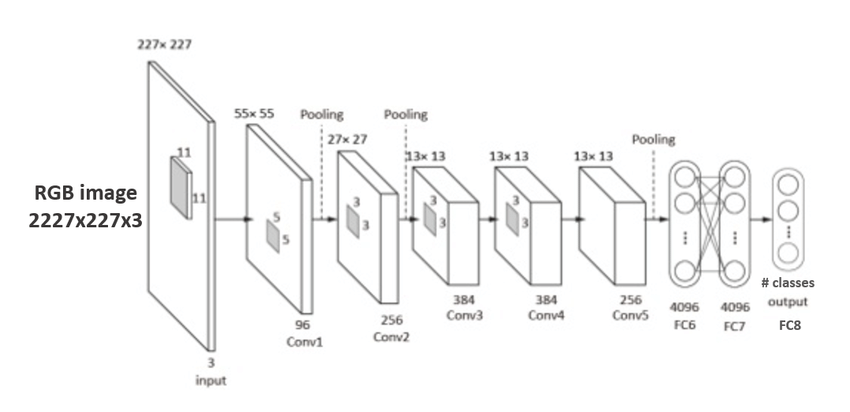

In [ ]:
img_shape = (227,227,3)
n_classes = 1000

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

alexnet = tf.keras.Sequential()

# Layer 1
alexnet.add(Conv2D(filters=96, kernel_size=(11, 11), input_shape=img_shape))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Layer 2
alexnet.add(Conv2D(filters=256, kernel_size=(5, 5)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Layer 3
alexnet.add(Conv2D(filters=384, kernel_size=(3, 3)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Layer 4
alexnet.add(Conv2D(filters=384, kernel_size=(3, 3)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))

# Layer 5
alexnet.add(Conv2D(filters=256, kernel_size=(3, 3)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

## Fully-connected
# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(n_classes, activation='softmax'))

alexnet.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(alexnet, show_shapes=True)

In [ ]:
def show_loss_accuracy_evolution(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

# LeNet-5

LeNet-5 is a classical CNN that was introduced back to 1998, is designed to recognize the digits from 0 to 9. 

LeNet-5 is such a classical model that it consists of two convolution layers followed by average pooling layers for each and apply three fully connected layers in the end of the network. In the original paper **sigmoid** activation function was used.

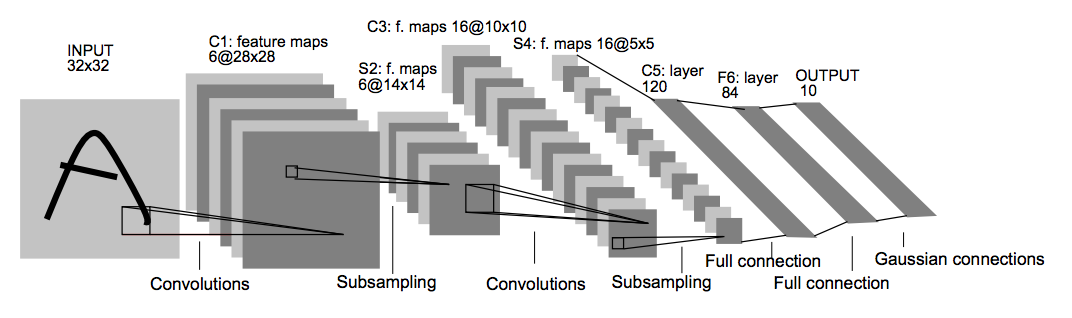

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Model / data parameters
num_classes = 10
img_shape = (28, 28, 1)

# load data, split between train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

plt.imshow(train_images[4])
plt.show()

### Create the model

Model original architecture:

- **First conv layer**: 6 filters of 3x3, sigmoid activation + Average Pooling
- **Second conv layer**: 16 filters of 3x3, sigmoid activation + Average Pooling
- **Flatten layer**
- **Dense layer**: 120 units, sigmoid activation
- **Dense layer**: 84 units, sigmoid activation
- **Output layer**: 10 units (classes), softmax activation

In [ ]:
## sigmoids and layers.AveragePooling2D
from tensorflow.keras import layers
'''model_old = keras.Sequential()
...
model_old.add(layers.Dense(10, activation = 'softmax'))'''

model_old = keras.Sequential()

model_old.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='sigmoid', input_shape=img_shape))
model_old.add(...)

model_old.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model_old.fit(x_train, y_train, batch_size=32 ,epochs=5, validation_split=0.2, verbose=1)

In [ ]:
results = model_old.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [ ]:
import pandas as pd
show_loss_accuracy_evolution(history)

### Improve the model

- **First conv layer**: 6 filters of 3x3, relu activation + Max Pooling
- **Second conv layer**: 16 filters of 3x3, relu activation + Max Pooling
- **Flatten layer**
- **Dense layer**: 120 units, relu activation
- **Dense layer**: 84 units, relu activation
- **Output layer**: 10 units (classes), softmax activation
Use relu instead sigmoids and MaxPooling2D, try any regularization

In [ ]:
## relu and layers.MaxPooling2D
'''model = keras.Sequential()
...
model.add(layers.Dense(10, activation = 'softmax'))'''

model = keras.Sequential()

model.add(...)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(x_train, y_train, batch_size=128 ,epochs=5, validation_split=0.2, verbose=1)

In [ ]:
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [ ]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
show_loss_accuracy_evolution(hist)

#### Take a photo and predict


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
img_path = '../images/digit.png'

img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
plt.imshow(img)
plt.show()

In [ ]:
x = np.expand_dims(img, -1)
x = np.expand_dims(x, 0)
x = x / 255.0
print(x.shape)
print('Old model character: {0} with probability: {1}'.format(model_old.predict(x).argmax(), model_old.predict(x).max()))
print('Improved model character: {0} with probability: {1}'.format(model.predict(x).argmax(), model.predict(x).max()))

# VGG-16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s

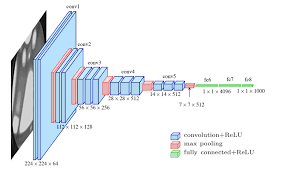

In [ ]:
model_VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    classes=1000,
    input_shape = (64,64,3),
)
model_VGG16.summary()

In [ ]:
# summarize filter shapes
for i, layer in enumerate(model_VGG16.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(i, layer.name, filters.shape)

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model


# redefine model to output right after the first hidden layer
model = keras.Model(inputs=model_VGG16.inputs, outputs=model_VGG16.layers[1].output)
print(model.summary())
# load the image with the required shape
img = load_img('../images/bird.jpeg', target_size=(64, 64))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(30,30))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
# show the figure
plt.show()

In [ ]:
model = keras.Model(inputs=model_VGG16.inputs,
                    outputs=model_VGG16.layers[9].output)
print(model.summary())
# load the image with the required shape
img = load_img('../images/bird.jpeg', target_size=(64, 64))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 16
ix = 1
plt.figure(figsize=(40, 40))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
# show the figure
plt.show()

In [ ]:
model = keras.Model(inputs=model_VGG16.inputs, outputs=model_VGG16.layers[9].output)
print(model.summary())
# load the image with the required shape
img = load_img('../images/bird.jpeg', target_size=(64, 64))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
for i in range(feature_maps.shape[-1]):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.show()